## 1. Conversion des fichiers XLSX vers CSV
## 2. Remplacement des point-virgules par des virgules via Notepad
## 3. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Importation des fichiers CSVs

In [2]:
erp = pd.read_csv('erp.csv')
liaison = pd.read_csv('liaison.csv')
web = pd.read_csv('web.csv', encoding='latin1')

## 5. Aperçu des dataframes

### 5.1 Aperçu table 'erp'

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### 5.2 Aperçu table 'liaison'

In [4]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### 5.3 Aperçu table 'web'

In [5]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## 6. Vérification des erreurs
- Vérifier le type de variable
- Vérifier les valeurs manquantes
- Vérifer les doublons
### 6.1 Table 'erp'

#### 6.1a Vérification des types de variables

In [6]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

#### Colonnes 'product_id et 'onsale_web' de type int64 -> convertion en object

In [7]:
erp['product_id'] = erp['product_id'].astype(str)
erp['onsale_web'] = erp['onsale_web'].astype(str)

#### 6.1b Vérification des valeurs manquantes

In [8]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

#### Aucune valeur manquante

#### 6.1c Vérification des doublons

In [9]:
erp['product_id'].duplicated(keep=False).sum()

0

#### Aucun doublon

### 6.2 Table 'liaison'

#### 6.2a Vérification des types de variables

In [10]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

#### Colonne 'product_id' de type int64 -> convertion en object

In [11]:
liaison['product_id'] = liaison['product_id'].astype(str)

#### 6.2b Vérification des valeurs manquantes

In [12]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

#### 91 valeurs manquantes dans la colonne 'id_web'.

#### Stocker ces valeurs dans un dataframe 'liaison_na' et, après jointure des tables 'web' et 'liaison', vérifier si ces lignes correspondent à un 'product_id' de la table 'web'.

In [13]:
liaison_na = liaison.loc[liaison['id_web'].isnull(), :]

#### 6.2c Vérification des doublons

In [14]:
liaison['product_id'].duplicated(keep=False).sum()

0

#### Aucun doublon

### 6.3 Table 'web'

#### 6.3a Vérification des types de variable

In [15]:
web.dtypes

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

#### Dates au format 'object'. Pas de requêtes concernant les dates -> Ignorer

#### 6.3b Vérification des valeurs manquantes

In [16]:
web.isnull().sum().head(6)

sku               85
virtual            0
downloadable       0
rating_count       0
average_rating    83
total_sales       83
dtype: int64

#### 85 valeurs manquantes dans la colonne 'sku' et 83 valeurs manquantes dans la colonne 'total_sales' -> Lignes à vérifier

#### Afficher les lignes dont la valeur 'sku' est manquante et 'total_sales' non manquante

In [17]:
web.loc[(web['sku'].isnull()) & (web['total_sales'].notnull()), ['sku', 'total_sales']]

,sku,total_sales
470,NaN,0.0
471,NaN,0.0


#### Valeur manquante 'sku' -> 'total_sales' manquant ou 0 -> lignes à supprimer

In [18]:
web.drop(web.loc[web['sku'].isnull(), :].index, inplace = True)

#### 6.3c Vérification des doublons

In [19]:
web['sku'].duplicated(keep=False).sum()

1428

#### 1428 doublons -> afficher le nombre de doublons par valeurs 'sku'

In [20]:
web_duplicated = web.pivot_table(index = ['sku'], aggfunc = 'size')
web_duplicated

sku
10014                  2
10459                  2
10775                  2
10814                  2
11049                  2
                      ..
8463                   2
9562                   2
9636                   2
9937                   2
bon-cadeau-25-euros    2
Length: 714, dtype: int64

#### Chaque valeur 'sku' possède un doublon -> chercher la cause

#### Comparaison des colonnes d'un doublon

In [21]:
web.loc[web['sku'] == '10014']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1399,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


#### -> Colonnes 'tax_status', 'post-type' et 'post_mime_type' différents

#### Suppression des lignes dont la valeur de 'post_type' est 'attachment'

In [22]:
web.drop(web[web['post_type'] == 'attachment'].index, inplace = True)

#### Revérification des doublons

In [23]:
web['sku'].duplicated(keep=False).sum()

0

#### Aucun doublon

## 7. Requête 1 : rapprochement des tables
### 7.1 Jointure des tables 'web' et 'liaison'

#### Renommer 'id_web' en 'sku' dans la table 'liaison' pour faciliter la jointure

In [24]:
liaison.rename(columns={'id_web':'sku'}, inplace = True)

#### Jointure à gauche des tables 'web' et 'liaison' car on garde toutes les clés de la table 'web'

In [25]:
web = pd.merge(web, liaison, on='sku', how='left', indicator = True)

#### Déplacement de la colonne 'product_id' en 2ème position dans la table 'web'

In [26]:
col = web.pop('product_id')
df = web.insert(1, 'product_id', col)

#### Aperçu de la table 'web'

In [27]:
web.head()

,sku,product_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,bon-cadeau-25-euros,4954,0,0,0,0.0,10.0,taxable,NaN,1.0,...,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,15298,3847,0,0,0,0.0,6.0,taxable,NaN,2.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,15296,3849,0,0,0,0.0,0.0,taxable,NaN,2.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,15300,3850,0,0,0,0.0,0.0,taxable,NaN,2.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,19814,4032,0,0,0,0.0,3.0,taxable,NaN,2.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


#### Vérification de la jointure : si aucune valeur différente de 'both' dans la colonne '_merge' = jointure OK

In [28]:
web.loc[web['_merge'] != 'both']

,sku,product_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


#### Pas d'erreurs dans la jointure

#### Valeurs manquantes dans la table 'liaison' : vérifier si les valeurs de la colonne 'product_id' de la table 'liaison_na' correspondent à une valeur 'product_id' de la table 'web'.

#### Création un dataframe des correspondances des valeurs manquantes

In [29]:
na_corresp = liaison_na.assign(InWeb = liaison_na.product_id.isin(web.product_id).astype(str))
na_corresp.head()

,product_id,id_web,InWeb
19,4055,NaN,False
49,4090,NaN,False
50,4092,NaN,False
119,4195,NaN,False
131,4209,NaN,False


#### Afficher les correspondances

In [30]:
na_corresp.loc[na_corresp['InWeb'] == 'True']

,product_id,id_web,InWeb


#### Aucune correspondance -> Valeurs 'id_web' nulles car produits non commercialisés en ligne

### 7.2 Jointure des tables 'web' et 'erp'

#### Jointure à gauche car on garde toutes les clés de la table 'web'

In [31]:
web = pd.merge(web, erp, on='product_id', how = 'left')

#### Déplacement des colonnes 'onsale_web', 'price', 'stock_quantity' et 'stock_status' en 3, 4, 5 et 6ème position dans la table 'web'

In [32]:
col_1 = web.pop('onsale_web')
df = web.insert(2, 'onsale_web', col_1)
col_2 = web.pop('price')
df = web.insert(3, 'price', col_2)
col_3 = web.pop('stock_quantity')
df = web.insert(4, 'stock_quantity', col_3)
col_4 = web.pop('stock_status')
df = web.insert(5, 'stock_status', col_4)

#### Aperçu de la table 'web'

In [33]:
web.head()

,sku,product_id,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,bon-cadeau-25-euros,4954,1,25.0,0,instock,0,0,0,0.0,...,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,15298,3847,1,24.2,0,outofstock,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,15296,3849,1,34.3,0,outofstock,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,15300,3850,1,20.8,0,outofstock,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,19814,4032,1,14.1,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


#### Vérification de la jointure : si aucune valeur différente de 'both' dans la colonne '_merge' = jointure OK

In [34]:
web.loc[web['_merge'] != 'both']

,sku,product_id,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


#### Pas d'erreurs dans la jointure

## 8. Requête 2 : Chiffre d'affaires
### 8.1 Chiffre d'affaires par produit

#### Création de la variable 'montant' (='price' x 'total_sales') dans la table 'web'

In [35]:
web['montant'] = web['price'] * web['total_sales']

#### Agrégation de la variable 'product_id' en additionnant les valeurs de la colonne 'montant'

In [36]:
CA_df = web.groupby(['product_id', 'post_title', 'price', 'onsale_web'])[['montant']].sum()

#### Réinitialisation de l'index

In [37]:
CA_df.reset_index(inplace=True)

#### Vérification du nombre d'individus

In [38]:
CA_df.shape

(714, 5)

#### Renommer la colonne 'montant' par 'CA'

In [39]:
CA_df.rename(columns={'montant' : 'CA'}, inplace = True)

#### Aperçu de la table 'CA_df'

In [40]:
CA_df.head()

,product_id,post_title,price,onsale_web,CA
0,3847,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,1,145.2
1,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,1,0.0
2,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,1,0.0
3,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,1,42.3
4,4039,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,1,0.0


#### Représentation graphique

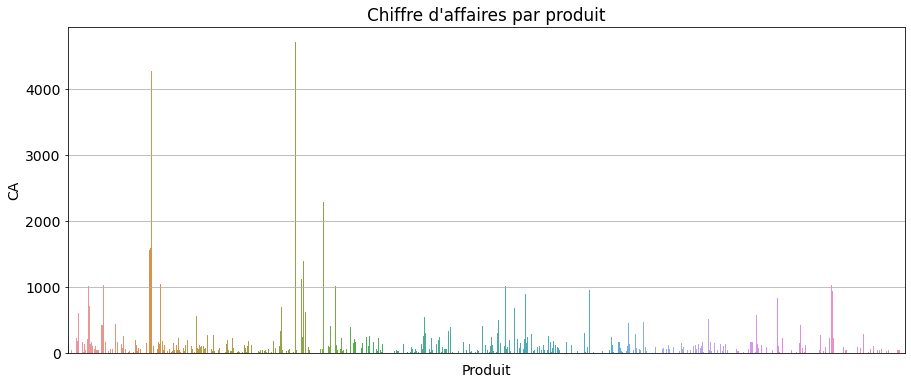

In [41]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
CA_hist = sns.barplot(data=CA_df, x = 'product_id', y = 'CA')
CA_hist.set(xticklabels=[])
CA_hist.tick_params(bottom=False)
CA_hist.set(xlabel='Produit')
plt.title("Chiffre d'affaires par produit")
plt.grid(axis='y')

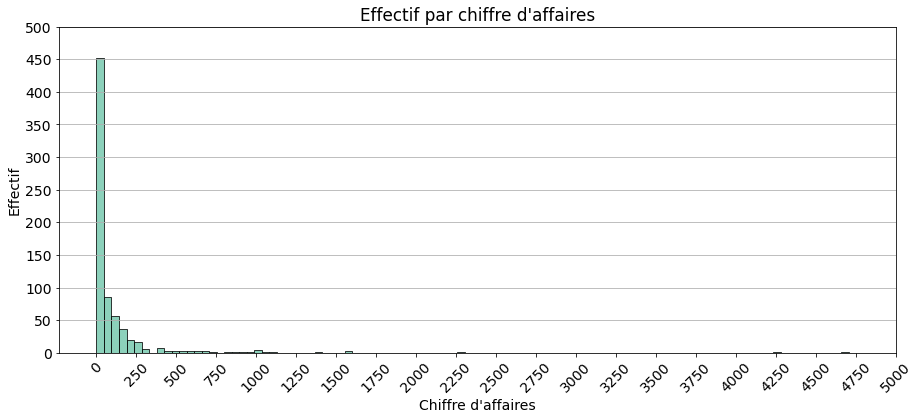

In [42]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
CA_hist = sns.histplot(data=CA_df, x = 'CA', bins = 100)
CA_hist.set(xlabel="Chiffre d'affaires")
CA_hist.set(ylabel="Effectif")
CA_hist.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000])
CA_hist.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]) 
plt.xticks(rotation=45)
plt.title("Effectif par chiffre d'affaires")
plt.grid(axis='y')

#### La majorité des produits (65%) ont un chiffre d'affaires situé entre 0 et 50 euros.

#### Afficher les 10 CA les plus élevés

In [43]:
CA_df.nlargest(10, 'CA')

,product_id,post_title,price,onsale_web,CA
194,4334,Champagne Gosset Grand Blanc de Blancs,49.0,1,4704.0
71,4144,Champagne Gosset Grand Rosé,49.0,1,4263.0
218,4402,Cognac Frapin VIP XO,176.0,1,2288.0
70,4142,Champagne Gosset Grand Millésime 2006,53.0,1,1590.0
69,4141,Champagne Gosset Grande Réserve,39.0,1,1560.0
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,1,1391.5
199,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,1,1125.0
79,4153,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,1,1044.0
651,6206,Domaine Giudicelli Patrimonio Blanc 2019,25.2,1,1033.2
30,4068,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,1,1029.2


#### 70% des produits au CA le plus élevé ont un valeur située entre 15 et 60 euros.
#### 60% de champagne présents dans la liste.

#### Afficher le nombre de produits dont le CA = 0

In [44]:
noCA = CA_df.loc[CA_df['CA'] == 0, :].shape[0]
noCA

329

#### 329 produits dont le CA est égal à 0.

#### Calcul du taux des produits dont le CA = 0

In [45]:
tx_noCA = round((noCA / len(CA_df)) * 100, 2)
tx_noCA

46.08

#### 46 % des produits ont un chiffre d'affaires nul, soit presque 1 produit sur deux.

### 8.2 Chiffre d'affaires réalisé en ligne

In [46]:
CA_online = CA_df.loc[CA_df['onsale_web'] == '1', 'CA'].sum()
CA_online

70568.6

#### Le chiffre d'affaires réalisé en ligne s'élève à 70 569 euros.

#### Chiffre d'affaires moyen par produit en ligne.

In [47]:
CA_mean = CA_online / len(CA_df)
CA_mean

98.83557422969189

#### Le chiffre d'affaires moyen par produit en ligne s'élève à 99 euros.

#### Calcul du CA moyen des produits en ligne moins les produits CA = 0

In [48]:
CA_mean_2 = CA_online / (len(CA_df) - noCA)
CA_mean_2

183.29506493506494

#### Le chiffre d'affaires moyen par produit en ligne excluant les produits au CA nul s'élève à 183 euros.

## 9. Analyse prix des produits
### 9.1 Agrégation de la variable 'product_id' dans la table 'web'

In [49]:
product_df = web.groupby(['product_id', 'post_title'])[['price']].mean()

#### Réinitialisation d'un index

In [50]:
product_df.reset_index(inplace=True)

#### Vérification nombre individus

In [51]:
product_df.shape

(714, 3)

#### Aperçu de la table 'product_df'

In [52]:
product_df.head()

,product_id,post_title,price
0,3847,Pierre Jean Villa Saint-Joseph Préface 2018,24.2
1,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3
2,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8
3,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1
4,4039,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0


### 9.2 Distribution empirique et représentation de l'écart-type et des outliers

Distribution empirique des prix des produits

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Ecart-type = 27.791042941002935


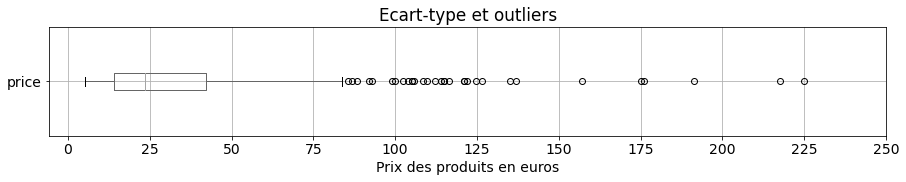

In [53]:
print('Distribution empirique des prix des produits\n')
print(product_df['price'].describe())
print('\nEcart-type =', product_df['price'].std(ddof=0))
plt.figure(figsize=(15,2))
plt.rcParams.update({'font.size': 14})
product_df.boxplot(column='price', vert=False)
plt.xlabel("Prix des produits en euros")
plt.title('Ecart-type et outliers')
plt.xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.show()

### 9.3 Liste des outliers

#### Outlier = Q3 + (1,5 x IQ) = 42,2 + (1,5 x 27,8) = 83,9

#### Création d'un dataframe des outliers

In [54]:
product_out = product_df[product_df['price'] > 83.9]

#### Liste des outliers

In [55]:
display(product_out.sort_values(by=['price'], ascending=False))

,product_id,post_title,price
199,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
426,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5
587,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3
218,4402,Cognac Frapin VIP XO,176.0
553,5767,Camille Giroud Clos de Vougeot 2016,175.0
221,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
381,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0
642,6126,Champagne Gosset Célébris Vintage 2007,135.0
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5
511,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8


#### Présence de nombreux grands ou 1er crus -> valeurs cohérentes.

#### Calcul du nombre d'outliers et du taux d'outliers par rapport au nombre total de produits

In [56]:
product_out.shape

(32, 3)

In [57]:
(len(product_out) / len(product_df)) * 100

4.481792717086835

#### 32 produits ont une valeur aberrante, soit 4,5% du total des produits.
### 9.4 Représentation graphique des outliers

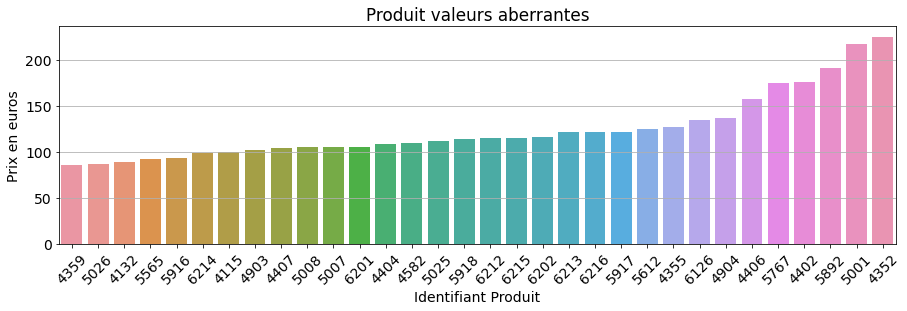

In [58]:
plt.figure(figsize=(15,4))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
prod_out_sorted = product_out.sort_values('price', ascending = True)
prod_out_hist = sns.barplot(data=prod_out_sorted, x = 'product_id', y = 'price')
plt.xticks(rotation=45)
prod_out_hist.set(xlabel='Identifiant Produit')
prod_out_hist.set(ylabel='Prix en euros')
plt.title("Produit valeurs aberrantes")
plt.grid(axis='y')

In [59]:
out_low = len(product_out[product_out['price'] < 100]) # -> 6
out_mid = len(product_out[(product_out['price'] >= 100) & (product_out['price'] < 150)]) # -> 20
out_high = len(product_out[product_out['price'] > 150]) # -> 6
print(out_low / len(product_out) * 100)
print(out_mid / len(product_out) * 100)
print(out_high / len(product_out) * 100)

18.75
62.5
18.75


#### 20 %  des outliers ont un prix entre 84 et 100 euros.

#### 60% des outliers ont un prix compris entre 100 et 150 euros.

#### 20 % des outliers ont un prix de plus de 150 euros.